<a href="https://colab.research.google.com/github/miguelsmachado/tutoriais/blob/master/maceteiro_de_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maceteiro de Pandas

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

##Limpeza da dados, outliers e valores ausentes

### Tratando os Dados

No caso desse conjunto de dados específico, o ideal é analisar os dados apenas do período em que se tem dados. Especialmente em algumas variáveis onde o volume é muito grande, qualquer tipo de preenchimento poderia enviesar os dados de forma que a análise deixasse de ser relevante.

Para outros casos, podemos considerar as seguintes hipóteses:

* Excluir
  * Se os dados ausentes estão em pequeno número,ocorrem aleatoriamente, e a ausência não carrega significado, é melhor excluir a linha. No caso da coluna, se ainda for possível analisar alguma parte dela, use-a, como é o caso aqui. Mas para algumas situações, o ideal é excluir a coluna.

* Preencher
  * Preencher as entradas com dados ausentes com valores estatísticos como a média, mediana, moda ou zeros.
  * A média é mais útil quando a distribuição dos dados é normal. Em dados com distribuição mais enviesada (*skewed*), a mediana é uma solução mais robusta, pois ela é menos sensível a outliers.
  * Uma `Regressão Linear` também pode ser útil, apesar de sensível a outliers, podem nos ajudar a inserir valores que nos ajudem.
  * Indetificar a entrada ausente com algum valor que indique isso pode ser mais informativo, quando a ausência representa valor. Por exemplo, em dados numéricos preencher com zero, e em categóricos criar uma categoria "Desconhecido". Atenção, pois os zeros não podem ser levados em consideração em análises estatísticas.

###Lendo o dataset

In [60]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv', sep=',')

# verificando as primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


###Verificando quantidade de dados ausentes:

In [61]:
# Em números inteiros
df.isnull().sum().sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

In [62]:
# Em números inteiros
round((df.isnull().sum().sort_values(ascending=False) / df.shape[0]) * 100, 2)

roubo_bicicleta               80.23
furto_bicicleta               80.23
apreensao_drogas_sem_autor    52.33
posse_drogas                  52.33
apf                           52.33
aaapai                        52.33
cmp                           52.33
trafico_drogas                52.33
cmba                          52.33
sequestro_relampago           41.86
furto_coletivo                41.86
extorsao                      41.86
furto_celular                 41.86
roubo_apos_saque              41.86
roubo_conducao_saque          41.86
roubo_cx_eletronico           41.86
estupro                       41.86
estelionato                   41.86
pol_civis_mortos_serv         41.86
pol_militares_mortos_serv     41.86
pessoas_desaparecidas         38.37
encontro_ossada               38.37
roubo_celular                 31.40
lesao_corp_culposa            27.91
ameaca                        27.91
sequestro                     27.91
lesao_corp_morte              27.91
registro_ocorrencias        

###Preenchedo valores ausentes de uma coluna a média dos valores dessa coluna:

In [24]:
df.fillna({'hom_culposo': df.hom_culposo.mean()}, inplace=True)

###Preenchedo valores ausentes de uma coluna a mediana dos valores dessa coluna:

In [28]:
df.fillna({'hom_por_interv_policial': df.hom_por_interv_policial.median()}, inplace=True)

###Preenchedo uma coluna com zero:

In [34]:
df.fillna({'lesao_corp_morte': 0}, inplace=True)

###Exluindo colunas

In [53]:
df.drop(columns=['roubo_bicicleta', 'furto_bicicleta'], inplace=True)

###Exluindo linhas com dados faltantes

In [ ]:
df.dropna(axis=0)
# para manter a alteração, seria necessário passar o atributo inplace=True.

###Excluindo as linhas que tem seu valor NaN em uma coluna específica:

In [95]:
df.dropna(subset=['hom_culposo'], inplace=True)

###Removendo outliers

In [72]:
# Criando uma lista com as variáveis que desejamos excluir outliers
lista = ['extorsao']

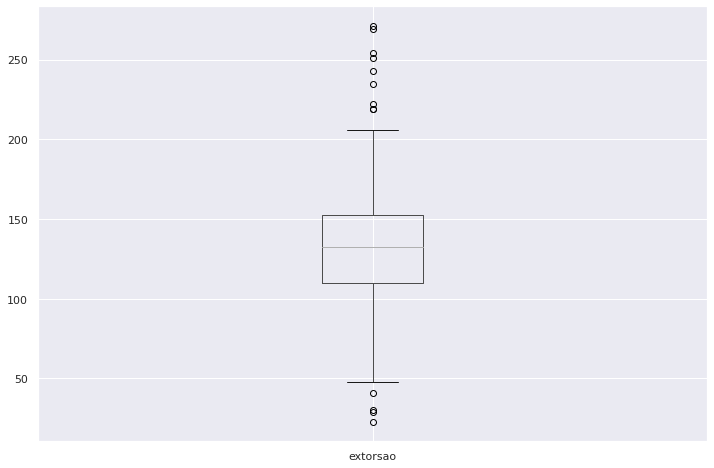

In [113]:
# Visualizando o Boxplot antes
df.boxplot(column=lista, figsize=(12,8));

In [114]:
for x in lista:

  # estabelecendo os parâmetros
  Q1 = df[x].quantile(.25)
  Q3 = df[x].quantile(.75)
  IIQ = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IIQ
  limite_superior = Q3 + 1.5 * IIQ

  # criando a seleção:
  selecao = (df[x] >= limite_inferior) & (df[x] <= limite_superior)
  
  # removendo os outliers
  df = df[selecao]

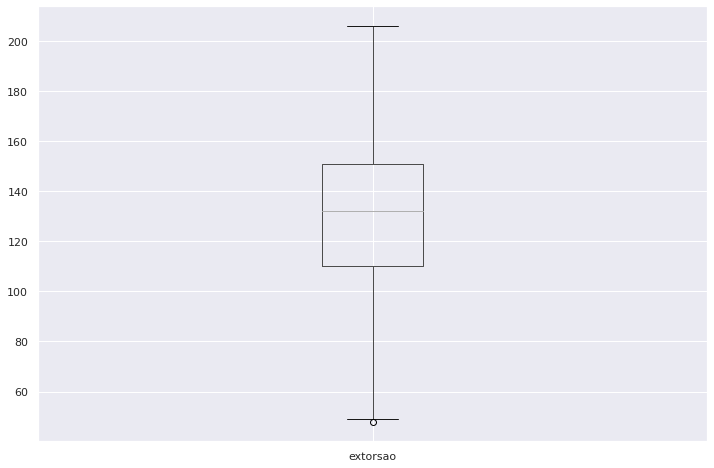

In [115]:
# visualizando o boxplot depois
df.boxplot(column=lista, figsize=(12,8));

##Analisando séries temporais

In [116]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/tutoriais/master/data/newsletter_alucar.csv")
df.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


###Transformando em `datetime`

In [117]:
df['mes'] = pd.to_datetime(df['mes'])

###Cálculo da diferença entre os valores (derivação)

Vamos analisar o crescimento do número de assinantes, derivar o para achar a velocidade do aumento e derivar para achar a aceleração dessa aumento:

In [118]:
df['aumento'] = df['assinantes'].diff()

In [119]:
df['aceleracao'] = df['aumento'].diff()

In [120]:
df.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


####Plotando as relações

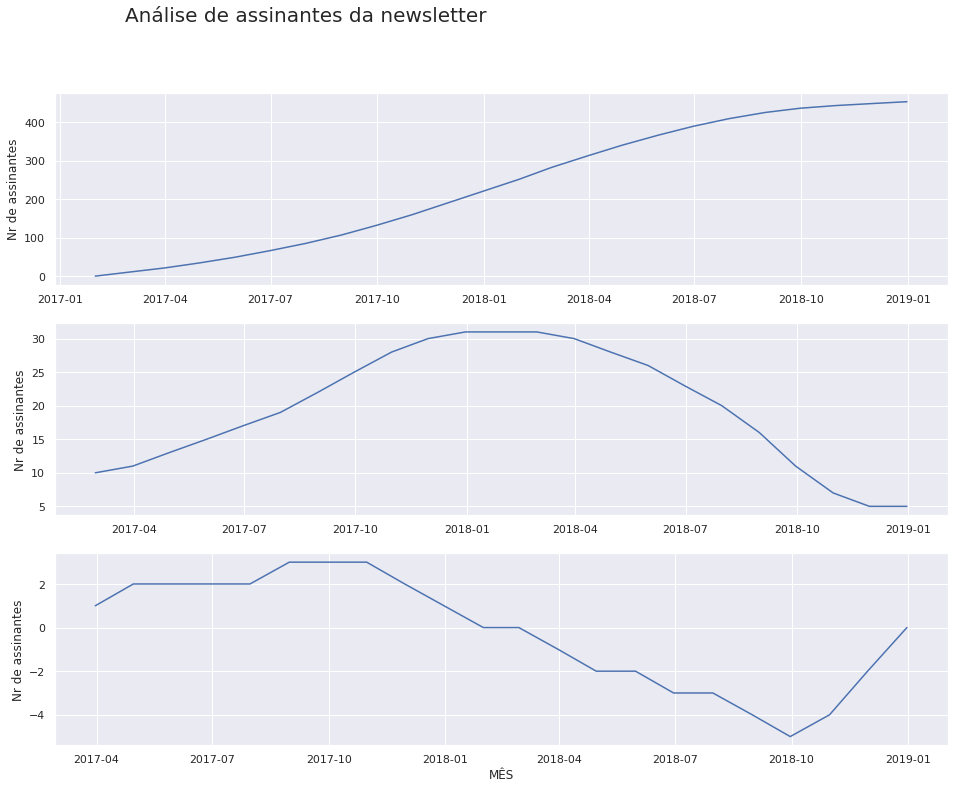

In [136]:
fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle("Análise de assinantes da newsletter", fontsize=20, ha='right')

plt.subplot(3,1,1)
ax = sns.lineplot(x='mes', y='assinantes', data=df)
ax.set_xlabel("")
ax.set_ylabel("Nr de assinantes")

plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=df)
ax.set_xlabel("")
ax.set_ylabel("Nr de assinantes")

plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=df)
ax.set_xlabel("MÊS")
ax.set_ylabel("Nr de assinantes")

plt.show()

###Análise de sazonalidade mensal

In [174]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/tutoriais/master/data/chocolura.csv")
df['mes'] = pd.to_datetime(df['mes'])

In [175]:
df.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


####Colocando o nome dos meses no DF

In [176]:
df['mes_do_ano'] = df['mes'].dt.month_name()
df.head()

,mes,vendas,mes_do_ano
0,2017-01-01,210,January
1,2017-02-01,185,February
2,2017-03-01,209,March
3,2017-04-01,280,April
4,2017-05-01,211,May


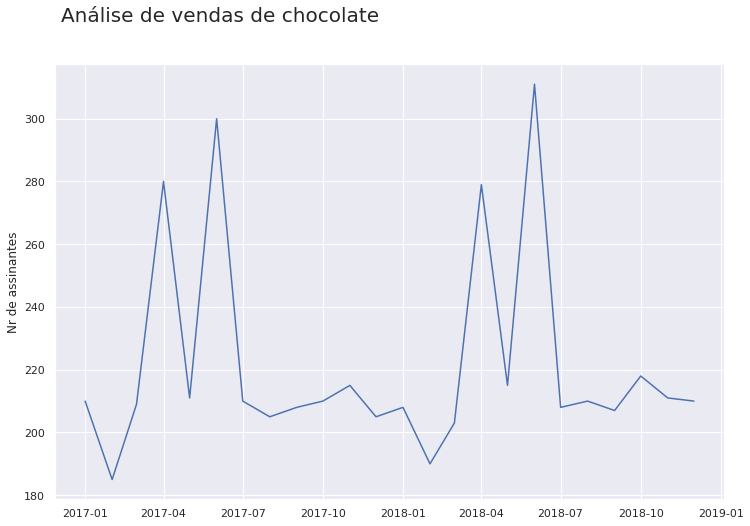

In [144]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Análise de vendas de chocolate", fontsize=20, ha='right')

ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.set_xlabel("")
ax.set_ylabel("Nr de assinantes")

plt.show()

####Gerando uma melhor visualização de sazonalidade

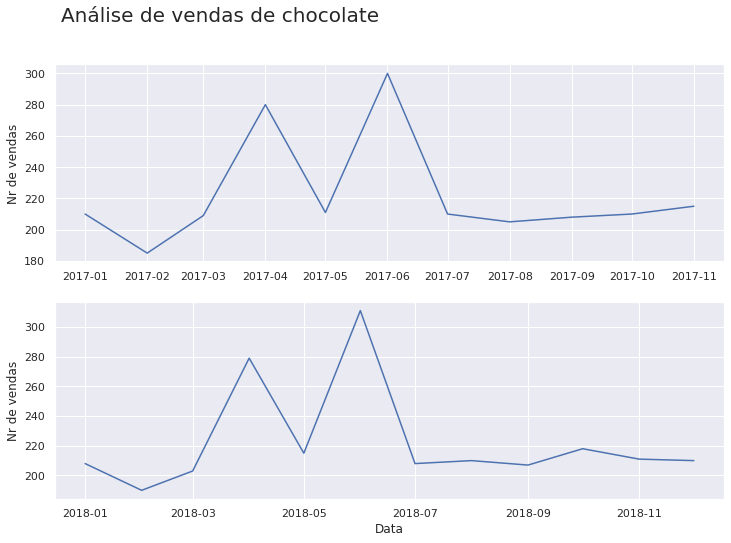

In [149]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Análise de vendas de chocolate", fontsize=20, ha='right')

# Realize os plots separados por anos

plt.subplot(2,1,1)
ax = sns.lineplot(x='mes', y='vendas', data=df[:11])
ax.set_xlabel("")
ax.set_ylabel("Nr de vendas")

plt.subplot(2,1,2)
ax = sns.lineplot(x='mes', y='vendas', data=df[12:])
ax.set_xlabel("Data")
ax.set_ylabel("Nr de vendas")

plt.show()

###Analisando sazonalidade diária

In [179]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/tutoriais/master/data/vendas_por_dia.csv")
df['dia'] = pd.to_datetime(df['dia'])
df.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


####Adicionando o dia da semana ao DF

In [166]:
df['dia_da_semana'] = df['dia'].dt.day_name()
df.head()

,dia,vendas,dia_da_semana
0,2018-10-01,50,Monday
1,2018-10-02,48,Tuesday
2,2018-10-03,56,Wednesday
3,2018-10-04,50,Thursday
4,2018-10-05,51,Friday


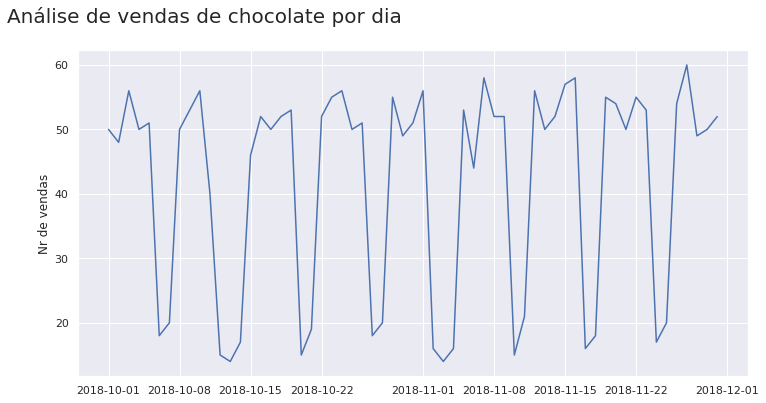

In [170]:
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Análise de vendas de chocolate por dia", fontsize=20, ha='right')

ax = sns.lineplot(x='dia', y='vendas', data=df)
ax.set_xlabel("")
ax.set_ylabel("Nr de vendas")

plt.show()

####Verificando as vendas por dia da semana

In [172]:
df.groupby('dia_da_semana').mean().round()

,vendas
dia_da_semana,
Friday,45.0
Monday,52.0
Saturday,16.0
Sunday,19.0
Thursday,51.0
Tuesday,52.0
Wednesday,53.0


###Analisando a autocorrelação

In [177]:
from pandas.plotting import autocorrelation_plot

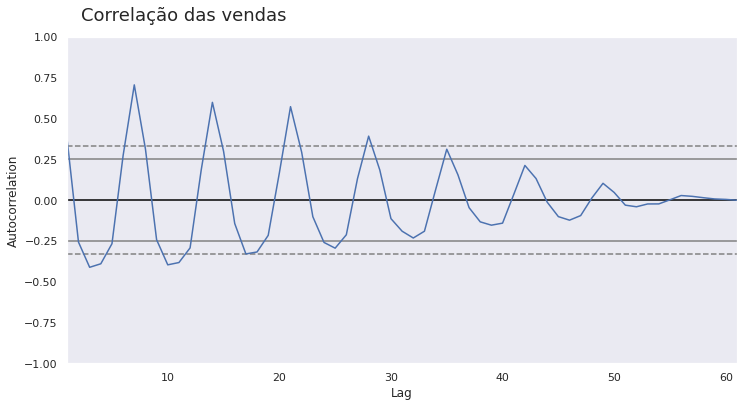

In [180]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['vendas'])
ax = ax

Podemos ver claramente a autocorrelação que se repete a cada 7 dias (Lag 7)

###Normalização

Correção para problemas como diminuições de vendas ao finais de semana

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/tutoriais/master/data/cafelura.csv")
df['mes'] = pd.to_datetime(df['mes'])
df.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


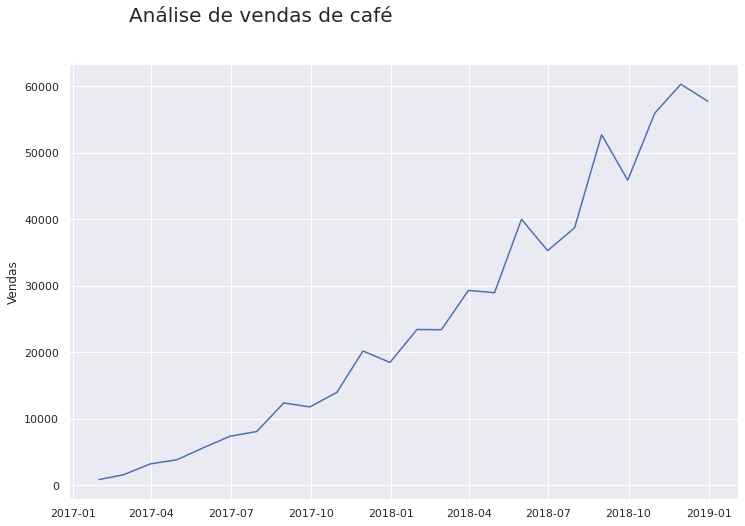

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Análise de vendas de café", fontsize=20, ha='right')

ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.set_xlabel("")
ax.set_ylabel("Vendas")

plt.show()

In [32]:
dias_uteis = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/tutoriais/master/data/dias_final_de_semana.csv")
df['vendas_dias_uteis'] = df['vendas']/ dias_uteis['quantidade_de_dias']

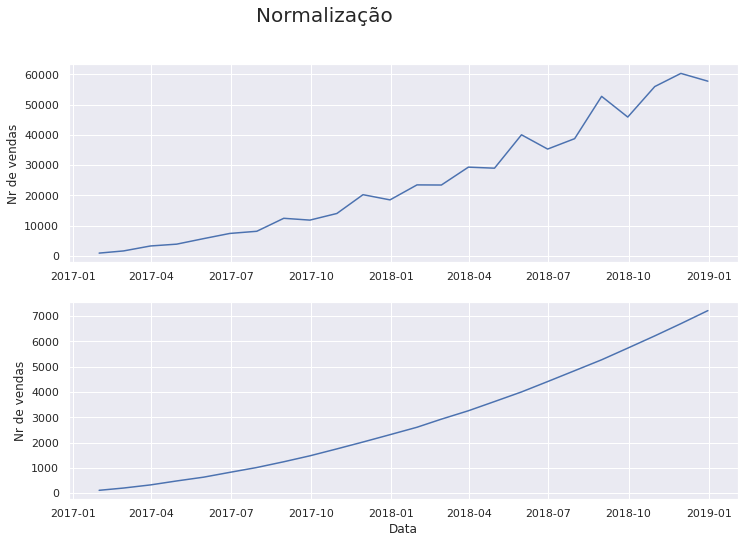

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Normalização", fontsize=20, ha='right')


plt.subplot(2,1,1)
ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.set_xlabel("")
ax.set_ylabel("Nr de vendas")

plt.subplot(2,1,2)
ax = sns.lineplot(x='mes', y='vendas_dias_uteis', data=df)
ax.set_xlabel("Data")
ax.set_ylabel("Nr de vendas")

plt.show()

### Gerando as informações acima, utilizando o **StatsModels**

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/tutoriais/master/data/newsletter_alucar.csv")
df.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


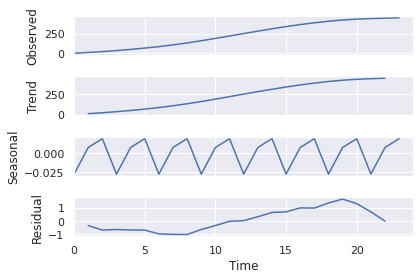

In [43]:
resultado = seasonal_decompose([df['assinantes']], freq=3)
ax = resultado.plot()

In [44]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [45]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,0,NaN,-0.027778,NaN
1,10,10.333333,0.007937,-0.341270
2,21,21.666667,0.019841,-0.686508
3,34,34.666667,-0.027778,-0.638889
4,49,49.666667,0.007937,-0.674603


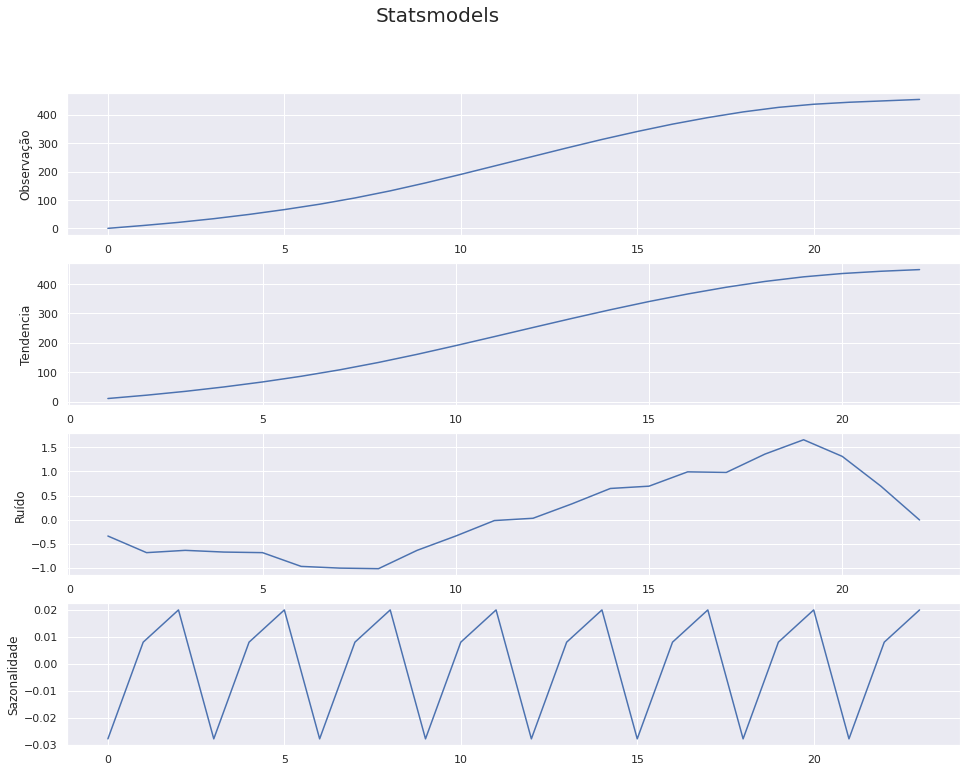

In [49]:
fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle("Statsmodels", fontsize=20, ha='right')


plt.subplot(4,1,1)
ax = sns.lineplot(x=resultado.index, y='observacao', data=resultado)
ax.set_xlabel("")
ax.set_ylabel("Observação")

plt.subplot(4,1,2)
ax = sns.lineplot(x=resultado.index, y='tendencia', data=resultado)
ax.set_xlabel("")
ax.set_ylabel("Tendencia")

plt.subplot(4,1,3)
ax = sns.lineplot(x=resultado.index, y='ruido', data=resultado)
ax.set_xlabel("")
ax.set_ylabel("Ruído")

plt.subplot(4,1,4)
ax = sns.lineplot(x=resultado.index, y='sazonalidade', data=resultado)
ax.set_xlabel("")
ax.set_ylabel("Sazonalidade")
plt.show()

###Tirando ruídos e média móvel

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/tutoriais/master/data/alucel.csv")
df['dia'] = pd.to_datetime(df['dia'])

df.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


####Média móvel

In [52]:
# Média móvel de 7 dias
df['media_movel'] = df['vendas'].rolling(7).mean()

In [54]:
# Média móvel de 21 dias
df['media_movel_21'] = df['vendas'].rolling(21).mean()

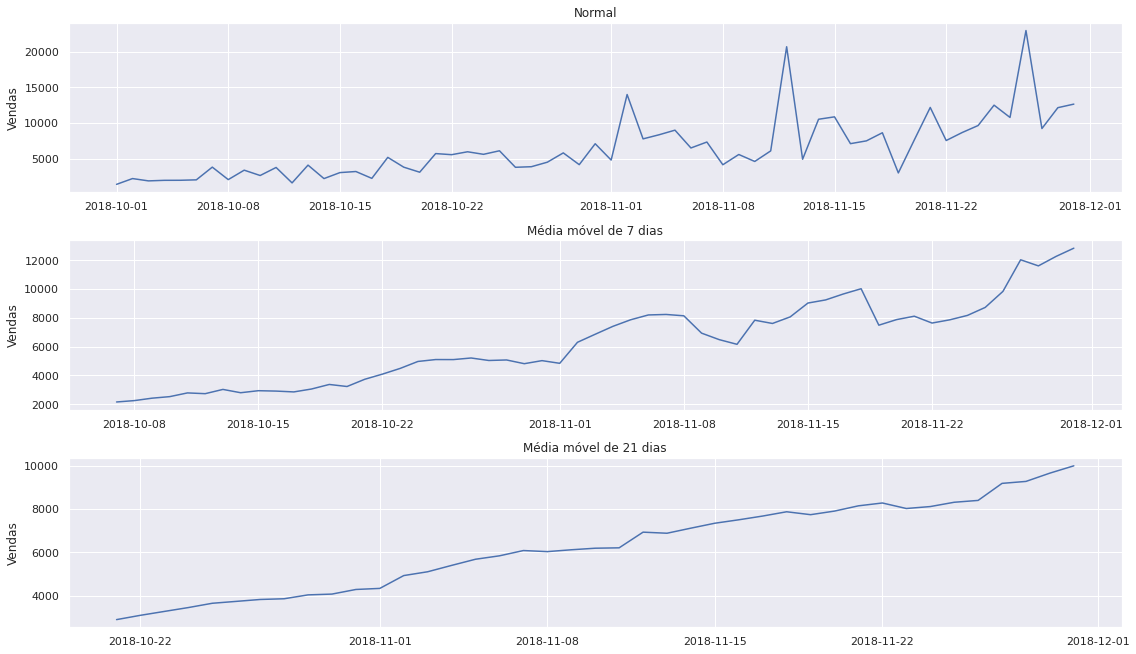

In [58]:
fig, ax = plt.subplots(figsize=(16,12))

plt.subplot(4,1,1)
ax = sns.lineplot(x='dia', y='vendas', data=df)
ax.set_title("Normal")
ax.set_xlabel("")
ax.set_ylabel("Vendas")

plt.subplot(4,1,2)
ax = sns.lineplot(x='dia', y='media_movel', data=df)
ax.set_title("Média móvel de 7 dias")
ax.set_xlabel("")
ax.set_ylabel("Vendas")

plt.subplot(4,1,3)
ax = sns.lineplot(x='dia', y='media_movel_21', data=df)
ax.set_title("Média móvel de 21 dias")
ax.set_xlabel("")
ax.set_ylabel("Vendas")

plt.tight_layout()